# Introduction 

For the purpose of this project, the following questions will be explored:

What are typical wind conditions at Irish airports?

Airports that will be looked at in this project:

Dublin (DUB)

Shannon (SNN)

Cork (ORK)

Knock (NOC)


## Aquiring the datasets.

Import Libraries.

In [664]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read in the CSV Files for the four airports and name the dataframes accordingly. Skip Meta data using skiprows and format. Parse the first column as date and set it as the index. Format the date as well for readability.

In [665]:
# Load the Shannon airport dataset.

shannon = pd.read_csv("data/dly518.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%Y %H:%M')


In [666]:
# load the Dublin airport dataset.

dublin = pd.read_csv("data/dly532.csv", parse_dates=["date"], index_col='date', skiprows=25, low_memory=False, date_format='%d-%b-%Y %H:%M')

In [667]:
# Load the Cork airport dataset.

cork = pd.read_csv("data/dly3904.csv", parse_dates=["date"], index_col='date', skiprows=24,low_memory=False, date_format='%d-%b-%Y %H:%M')

In [668]:
# Load the Knock airport dataset.

knock = pd.read_csv("data/dly4935.csv", parse_dates=["date"], index_col='date', skiprows=24, low_memory=False, date_format='%d-%b-%Y %H:%M')

Check the datasets load correctly by checking the first few rows. 

In [669]:
shannon.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Sept-45,0,19.2,0,14.4,0,13.6,0,0.2,1013.8,12.0,...,0,27,1.6,0,,1.6,2.3,,,
02-Sept-45,0,20.7,0,14.8,0,13.4,3,0.0,1018.2,7.3,...,0,16,9.3,0,,2.5,3.5,,,
03-Sept-45,0,23.3,0,11.8,0,9.6,3,0.0,1021.2,4.2,...,0,12,11.4,0,,2.9,3.9,,,
04-Sept-45,0,21.6,0,9.4,0,6.7,3,0.0,1024.2,6.2,...,0,18,5.3,0,,2,2.7,,,
05-Sept-45,0,21.3,0,12.2,0,11.3,3,0.0,1024.9,4.9,...,0,13,3.6,0,,1.8,2.4,,,


In [670]:
dublin.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Jan-42,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,17.2,...,,0.0,0,,,1.1,1.4,,,
02-Jan-42,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,15.2,...,,0.0,0,,,0.7,0.9,,,
03-Jan-42,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,14.0,...,,0.1,0,,,0.5,0.6,,,
04-Jan-42,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,17.0,...,,0.6,0,,,0.6,0.7,,,
05-Jan-42,0,3.5,1,-0.8,0,0,0,0.6,1013.4,13.0,...,,3.4,0,,,0.6,0.7,,,


In [671]:
cork.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Jan-62,0,2.8,1,-2.5,,,8,,999.6,9.2,...,0,24,,0,,,,,,
02-Jan-62,0,2.8,1,-3.7,,,8,,1005.8,5.9,...,0,10,,0,,,,,,
03-Jan-62,0,2.3,1,-3.8,,,8,,1007.8,6.7,...,0,13,,0,,,,,,
04-Jan-62,0,6.6,0,0.6,,,8,,1007.8,4.5,...,0,12,,0,,,,,,
05-Jan-62,0,9.3,0,0.6,,,8,,1002.2,12.7,...,0,29,,0,,,,,,


In [672]:
knock.head()

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
01-Aug-96,4,,4,,,,8,,,,...,1,,1.1,0,,,,,,
02-Aug-96,0,15.1,0,9.2,,,0,0.3,999.2,7.7,...,0,18,,0,,,,,,
03-Aug-96,0,18,0,11.6,0,11.4,0,0,1002.1,6.6,...,0,18,5.7,0,15.6,2.7,3.7,2.7,2.7,2.7
04-Aug-96,0,20.4,0,9.6,0,8.6,0,0.1,991.7,11.3,...,0,32,6.8,0,15.975,3.7,5,6.2,6.2,6.3
05-Aug-96,0,13.7,0,8.7,0,10.9,0,13.3,983.8,7.8,...,0,24,0,0,14.625,1.1,1.8,0,-6.1,-5.9


## Cleaning the datasets.

There is missing values in some of the columns. Replace these with NaN objects.

In [673]:
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

shannon.replace(to_replace=' ', value=np.nan, inplace=True)

# Check.

 # shannon.head()

In [674]:
dublin.replace(to_replace=' ', value=np.nan, inplace=True)
# dublin.head()

In [675]:
cork.replace(to_replace=' ', value=np.nan, inplace=True)
# cork.head() 

In [676]:
knock.replace(to_replace=' ', value=np.nan, inplace=True)
# knock.head()

For the purpose of this project, will be looking at the following columns for analysis.


__'wdsp:'   -  Mean Wind Speed (knot)__

__'hm:'    -  Highest ten minute mean wind speed (knot)__

__'ddhm:'   -  Wind Direction at max 10 min. mean (deg)__

__'hg: '   -  Highest Gust (knot)__

First, drop any rows that are missing values.

In [677]:
# Drop rows missing values in 'wdsp' column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

# Shannon.

shannon_mean_wind_speed = shannon[['wdsp']].copy()
shannon_mean_wind_speed.isna().sum()

shannon_mean_wind_speed.dropna(inplace=True)
shannon_mean_wind_speed.isna().sum()
# Dublin.

dublin_mean_wind_speed = dublin[['wdsp']].copy()
dublin_mean_wind_speed.isna().sum()

dublin_mean_wind_speed.dropna(inplace=True)
dublin_mean_wind_speed.isna().sum()

# Cork.

cork_mean_wind_speed = cork[['wdsp']].copy()
cork_mean_wind_speed.isna().sum()

cork_mean_wind_speed.dropna(inplace=True)
cork_mean_wind_speed.isna().sum()  
# Knock.

knock_mean_wind_speed = knock[['wdsp']].copy()
knock_mean_wind_speed.isna().sum()

knock_mean_wind_speed.dropna(inplace=True)
knock_mean_wind_speed.isna().sum()

wdsp    0
dtype: int64

In [678]:
# Drop rows missing values in 'hm' column.

# Shannon.

shannon_max_wind_speed = shannon[['hm']].copy()
shannon_max_wind_speed.isna().sum()

shannon_max_wind_speed.dropna(inplace=True)
shannon_max_wind_speed.isna().sum()

# Check.
shannon_max_wind_speed.head()

# Dublin.

dublin_max_wind_speed = dublin[['hm']].copy()
dublin_max_wind_speed.isna().sum()
dublin_max_wind_speed.dropna(inplace=True)
dublin_max_wind_speed.isna().sum()
# dublin_max_wind_speed.head()

# Cork.

cork_max_wind_speed = cork[['hm']].copy()
cork_max_wind_speed.isna().sum()
cork_max_wind_speed.dropna(inplace=True)
cork_max_wind_speed.isna().sum()
# cork_max_wind_speed.head()

# Knock.

knock_max_wind_speed = knock[['hm']].copy()
knock_max_wind_speed.isna().sum() 
knock_max_wind_speed.dropna(inplace=True)
knock_max_wind_speed.isna().sum()
# knock_max_wind_speed.head()

hm    0
dtype: int64

In [679]:
# Drop rows missing values in 'ddhm' column.

# Shannon.

shannon_mean_wind_direction = shannon[['ddhm']].copy()
shannon_mean_wind_direction.isna().sum()
shannon_mean_wind_direction.dropna(inplace=True)
shannon_mean_wind_direction.isna().sum()

# Dublin.

dublin_mean_wind_direction = dublin[['ddhm']].copy()
dublin_mean_wind_direction.isna().sum()
dublin_mean_wind_direction.dropna(inplace=True)
dublin_mean_wind_direction.isna().sum()

# Cork.
cork_mean_wind_direction = cork[['ddhm']].copy()
cork_mean_wind_direction.isna().sum()
cork_mean_wind_direction.dropna(inplace=True)
cork_mean_wind_direction.isna().sum()

# Knock.

knock_mean_wind_direction = knock[['ddhm']].copy()
knock_mean_wind_direction.isna().sum()
knock_mean_wind_direction.dropna(inplace=True)
knock_mean_wind_direction.isna().sum()


ddhm    0
dtype: int64

In [680]:
# Drop rows missing values in 'hg' column.

# Shannon.

shannon_max_gust_speed = shannon[['hg']].copy()
shannon_max_gust_speed.isna().sum()
shannon_max_gust_speed.dropna(inplace=True)
shannon_max_gust_speed.isna().sum()


# Dublin.
dublin_max_gust_speed = dublin[['hg']].copy()
dublin_max_gust_speed.isna().sum()
dublin_max_gust_speed.dropna(inplace=True)
dublin_max_gust_speed.isna().sum()


# Cork.
cork_max_gust_speed = cork[['hg']].copy()
cork_max_gust_speed.isna().sum()
cork_max_gust_speed.dropna(inplace=True)
cork_max_gust_speed.isna().sum()


# Knock.
knock_max_gust_speed = knock[['hg']].copy()
knock_max_gust_speed.isna().sum()
knock_max_gust_speed.dropna(inplace=True)
knock_max_gust_speed.isna().sum()


hg    0
dtype: int64

Drop the unwanted columns and rename the ones being kept to improve readability.

In [681]:
# Drop unnecessary columns and rename. 
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

shannon = shannon[['wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
    'wdsp': 'Mean_Wind_Speed(knots)', 
    'hm': 'Max_Wind_Speed(knots)', 
    'ddhm': 'Mean_Wind_Direction(degrees)', 
    'hg': 'Max_Gust_Speed(knots)'})    

# Check.

shannon.head()

,Mean_Wind_Speed(knots),Max_Wind_Speed(knots),Mean_Wind_Direction(degrees),Max_Gust_Speed(knots)
date,,,,
01-Sept-45,12.0,20,90,27
02-Sept-45,7.3,12,100,16
03-Sept-45,4.2,8,100,12
04-Sept-45,6.2,13,310,18
05-Sept-45,4.9,9,100,13


In [682]:
dublin = dublin[['wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
    'wdsp': 'Mean_Wind_Speed(knots)', 
    'hm': 'Max_Wind_Speed(knots)', 
    'ddhm': 'Mean_Wind_Direction(degrees)', 
    'hg': 'Max_Gust_Speed(knots)'})    

# dublin.head()

In [683]:
cork = cork[['wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
    'wdsp': 'Mean_Wind_Speed(knots)', 
    'hm': 'Max_Wind_Speed(knots)', 
    'ddhm': 'Mean_Wind_Direction(degrees)', 
    'hg': 'Max_Gust_Speed(knots)'})    

# cork.head()

In [684]:
knock = knock[['wdsp', 'hm', 'ddhm', 'hg']].rename(columns={
    'wdsp': 'Mean_Wind_Speed(knots)',
    'hm': 'Max_Wind_Speed(knots)',
    'ddhm': 'Mean_Wind_Direction(degrees)',
    'hg': 'Max_Gust_Speed(knots)'})

# knock.head()

Combine the four airport datasets into one Dataframe to create comparrison plots. Need to create a Column for the airport names to be stored. This can be acheived using pandas.concat. It will take the multiple dataframes and stick them together.

In [685]:
# Store the four airport DataFrames into a single DF. Adsd an Airport column.
# See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

all_airports = pd.concat([
    shannon.assign(Airport='Shannon'),
    dublin.assign(Airport='Dublin'),
    cork.assign(Airport='Cork'),
    knock.assign(Airport='Knock')
], axis=0)

# Move Airport column to front for readability.
# See: https://stackoverflow.com/questions/21415661/pandas-move-column-to-first-position-in-dataframe

all_airports = all_airports[['Airport'] + [c for c in all_airports.columns if c != 'Airport']]

# Check
all_airports.head()


,Airport,Mean_Wind_Speed(knots),Max_Wind_Speed(knots),Mean_Wind_Direction(degrees),Max_Gust_Speed(knots)
date,,,,,
01-Sept-45,Shannon,12.0,20,90,27
02-Sept-45,Shannon,7.3,12,100,16
03-Sept-45,Shannon,4.2,8,100,12
04-Sept-45,Shannon,6.2,13,310,18
05-Sept-45,Shannon,4.9,9,100,13


## Investigating / Analysising Data

__Histogram of Mean Wind Speed__

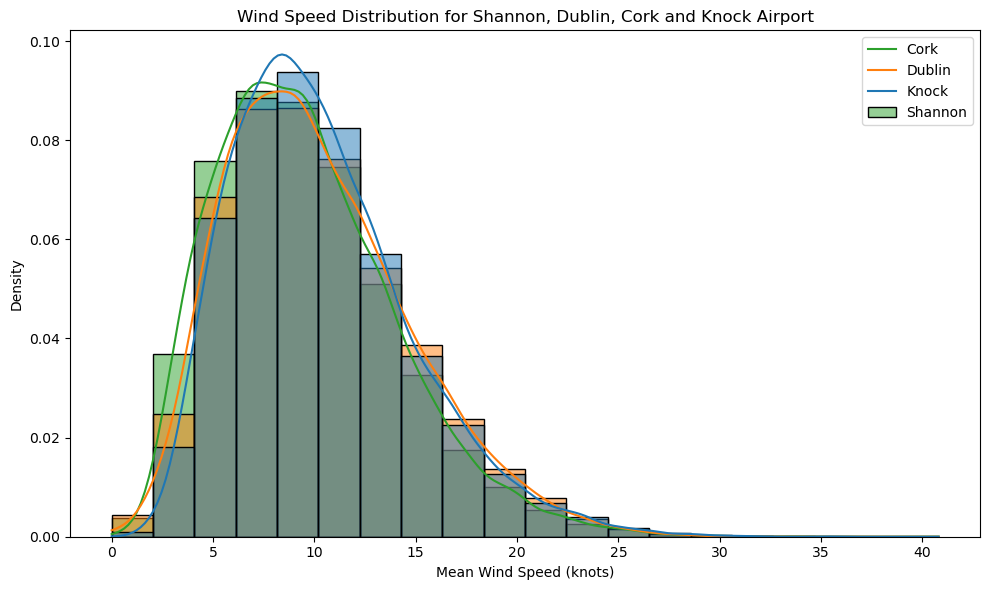

In [686]:
# Plot Histogram of Mean Wind Speed for All Airports
 

wind_speeds = all_airports.pivot(columns='Airport', values='Mean_Wind_Speed(knots)')


plt.figure(figsize=(10, 6))
sns.histplot(data=wind_speeds, bins=20, kde=True, stat="density", common_norm=False)
plt.title('Wind Speed Distribution for Shannon, Dublin, Cork and Knock Airport')
plt.xlabel('Mean Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(wind_speeds.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Speed_Distribution_All_Airports.png')

plt.show()

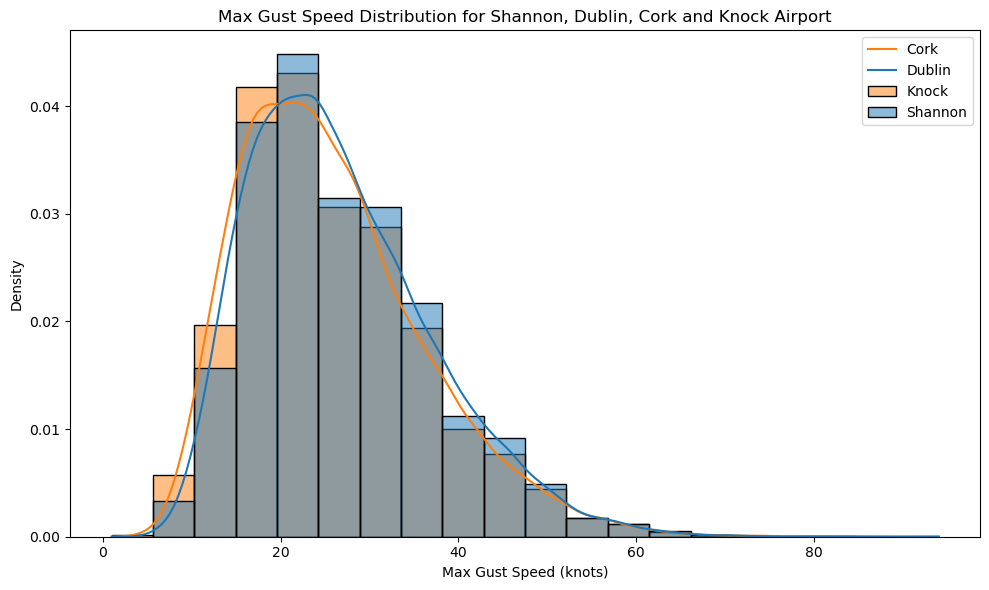

In [687]:
# Plot histogram of Max Gust Speed for All Airports

max_gust_speeds = all_airports.pivot(columns='Airport', values='Max_Gust_Speed(knots)')
plt.figure(figsize=(10, 6))
sns.histplot(data=max_gust_speeds, bins=20, kde=True, stat="density", common_norm=False)


plt.title('Max Gust Speed Distribution for Shannon, Dublin, Cork and Knock Airport')
plt.xlabel('Max Gust Speed (knots)')
plt.ylabel('Density')
plt.legend(max_gust_speeds.columns)
plt.tight_layout()

# plt.savefig('Max_Gust_Speed_Distribution_All_Airports.png')

plt.show()


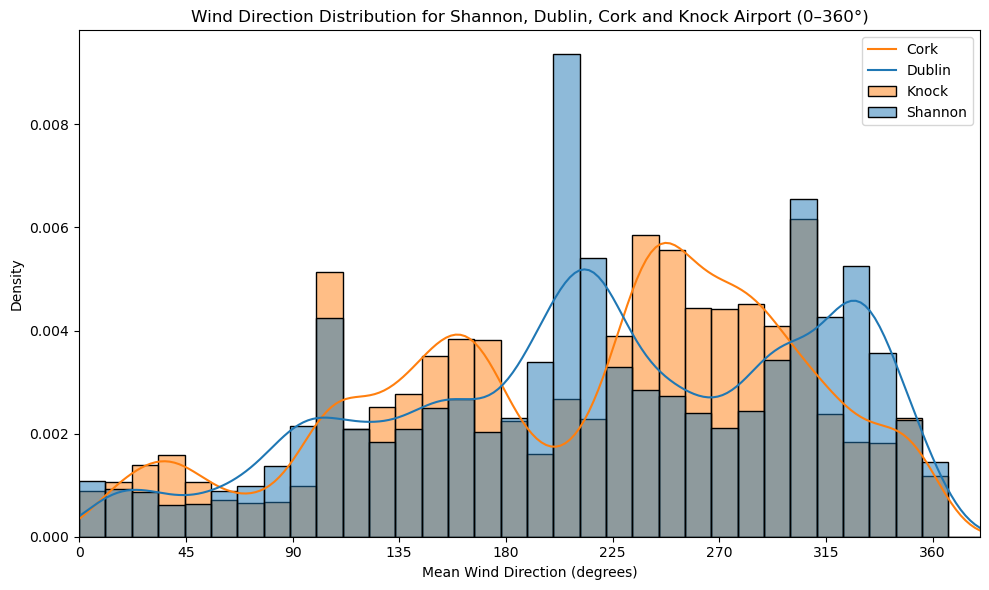

In [688]:
# Plot histogram of Mean Wind Direction(degrees) for All Airports

wind_directions = all_airports.pivot(columns='Airport', values='Mean_Wind_Direction(degrees)')

plt.figure(figsize=(10, 6))
sns.histplot(data=wind_directions, bins=36, kde=True, stat="density", common_norm=False)
plt.title('Wind Direction Distribution for Shannon, Dublin, Cork and Knock Airport (0–360°)')
plt.xlabel('Mean Wind Direction (degrees)')
plt.ylabel('Density')

# Extending x-axis slightly beyond 360 to accommodate tick marks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(0, 380) 

# Set x-ticks from 0 to 360 at intervals of 45 degrees so easier to read.

plt.xticks(range(0, 361, 45)) 

plt.legend(wind_directions.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Direction_Distribution_All_Airports.png')

plt.show()


An


Airport	Color	Observations
Cork	Orange	Strong peak around 220°–240° (southwest winds dominate).
Dublin	Blue	Broad distribution, but notable density around 200°–240°.
Knock	Black	More evenly spread, but slight peak near 180° (southerly winds).
Shannon	Gray	Similar to Cork, with a strong southwest bias.


Southwest winds are dominant across most airports — consistent with Ireland’s prevailing wind patterns due to Atlantic weather systems.

Knock Airport shows a more diverse wind direction profile, possibly due to its inland and elevated location.

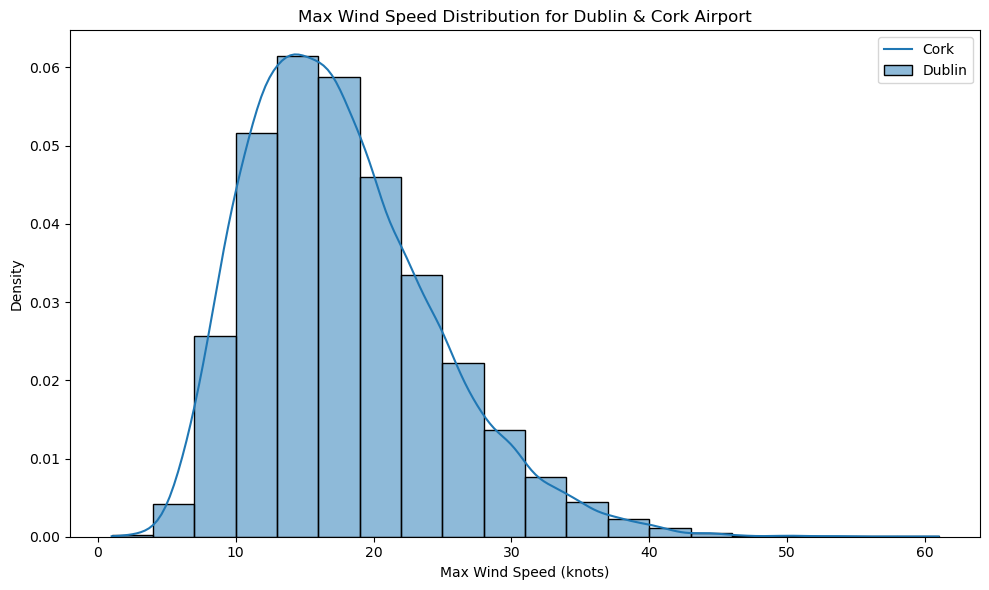

In [689]:
# Plot histogram of Max Wind Speed for cork and Dublin Airport

max_wind_speeds = all_airports.pivot(columns='Airport', values='Max_Wind_Speed(knots)')

plt.figure(figsize=(10, 6))
sns.histplot(data=max_wind_speeds, bins=20, kde=True, stat="density", common_norm=False)

plt.title('Max Wind Speed Distribution for Dublin & Cork Airport') 
plt.xlabel('Max Wind Speed (knots)')
plt.ylabel('Density')
plt.legend(max_wind_speeds.columns)
plt.tight_layout()

# plt.savefig('Max_Wind_Speed_Distribution_Dublin_Cork_Airports.png')

plt.show()

__Analysis of Max Wind Speed for Cork and Dublin:__

Both Cork and Dublin airport show their highest density between 10 and 20 knots, with both their modal wind speed being around 14-16 knots. This would suggest that the typical maximun daily wind speeds are generally moderate at both locations. The distributionsa re positively skewed, most days see moderate winds and a samll amount of days see high wind days. 

Cork experiences more extreme wind events, they extend beyond 40-50 knots and while Dublin also experiences some extremes they are usually below 30-35 knots. It would be fair to say that Cork Airport is more exposed to severe wind events, and this is more than likely due to its position on the West of Ireland, close to the Atlantic Ocean. Cross winds of 35-40 knots may opertational risks of delays or cancelations of flights more likely to happen at Cork Airport rather than Dublin Airport, but almost only on days with extreme wind conditions.


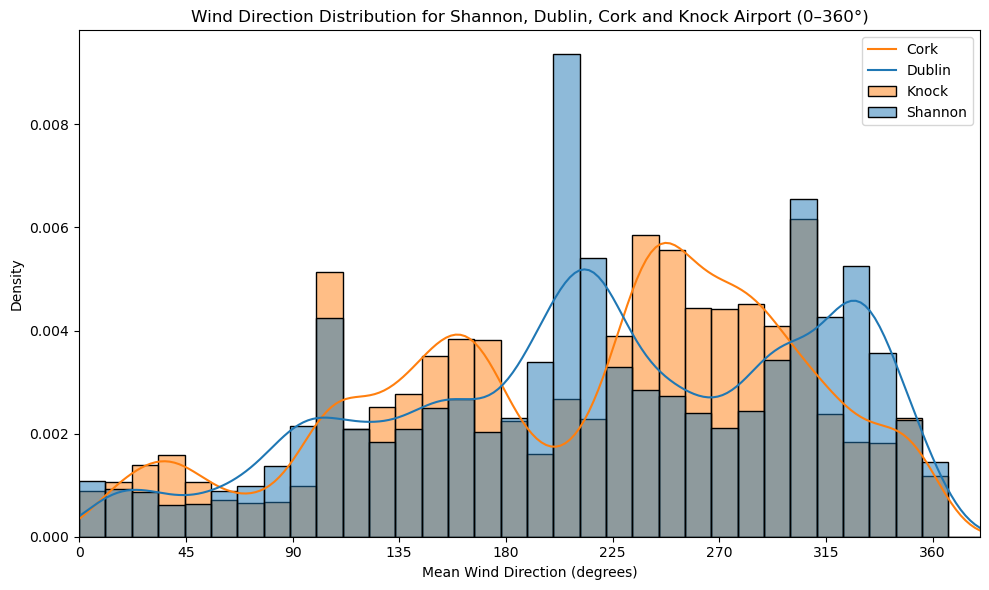

In [690]:
# Plot histogram of Mean Wind Direction(degrees) for All Airports

wind_directions = all_airports.pivot(columns='Airport', values='Mean_Wind_Direction(degrees)')

plt.figure(figsize=(10, 6))
sns.histplot(data=wind_directions, bins=36, kde=True, stat="density", common_norm=False)
plt.title('Wind Direction Distribution for Shannon, Dublin, Cork and Knock Airport (0–360°)')
plt.xlabel('Mean Wind Direction (degrees)')
plt.ylabel('Density')

# Extending x-axis slightly beyond 360 to accommodate tick marks.
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(0, 380) 

# Set x-ticks from 0 to 360 at intervals of 45 degrees so easier to read.

plt.xticks(range(0, 361, 45)) 

plt.legend(wind_directions.columns)
plt.tight_layout()

# plt.savefig('Mean_Wind_Direction_Distribution_All_Airports.png')

plt.show()


Histogram doesnt give good insight for 360 degrees win d direction data - look at windrose

Windrose documentation

https://python-windrose.github.io/windrose/usage-output.html

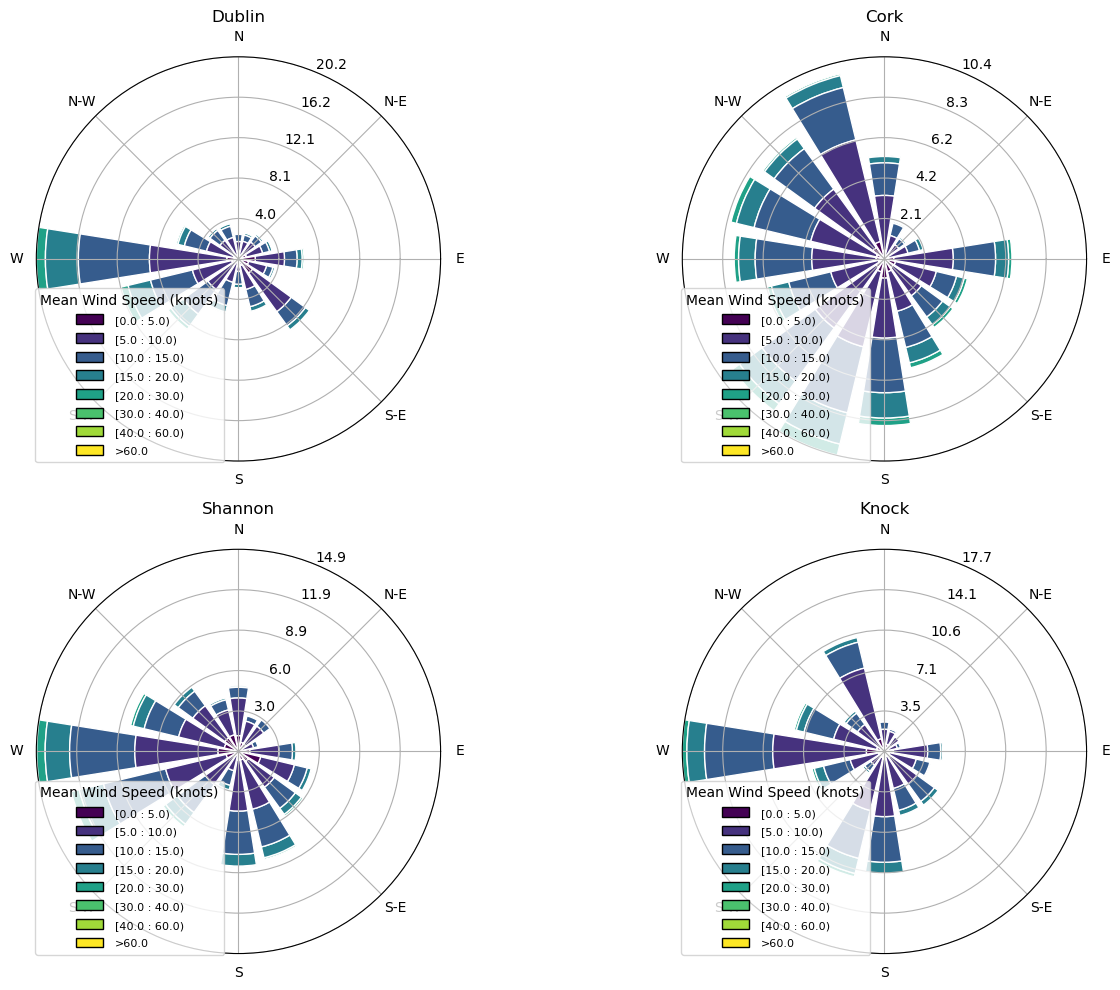

In [693]:
fig = plt.figure(figsize=(14, 10))

airports = ['Dublin', 'Cork', 'Shannon', 'Knock']

for i, airport in enumerate(airports, 1):
    # Use a 2x2 grid to accommodate four airports
    ax = fig.add_subplot(2, 2, i, projection='windrose')
    data = all_airports[all_airports['Airport'] == airport].copy()

    # ensure numeric types and drop invalid rows
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Mean_Wind_Speed(knots)'], errors='coerce')

    mask = directions.notna() & speeds.notna()
    if not mask.any():
        ax.set_title(f"{airport} (no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}")
    ax.set_legend(title="Mean Wind Speed (knots)")

plt.tight_layout()
plt.savefig('Wind_Rose_All_Airports.png')
plt.show()


__Analysis of Mean Wind Direction(degrees) for Shannon, Dublin, Cork and Knock:__

Cork appears to have a	Strong peak around 220°–240° (southwest winds dominate).

Dublin looks to have strong influence from west winds 

Knock	is	More evenly spread, but slight peak near 180° (southerly winds).

Shannon	 is Similar to Cork, with a strong southwest bias.


Southwest winds are dominant across most airports — consistent with Ireland’s prevailing wind patterns due to Atlantic weather systems.

Knock Airport shows a more diverse wind direction profile, possibly due to its inland and elevated location.

Windrose documentation

https://python-windrose.github.io/windrose/usage-output.html

C:\Users\laura\AppData\Local\Temp\ipykernel_1980\132792426.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


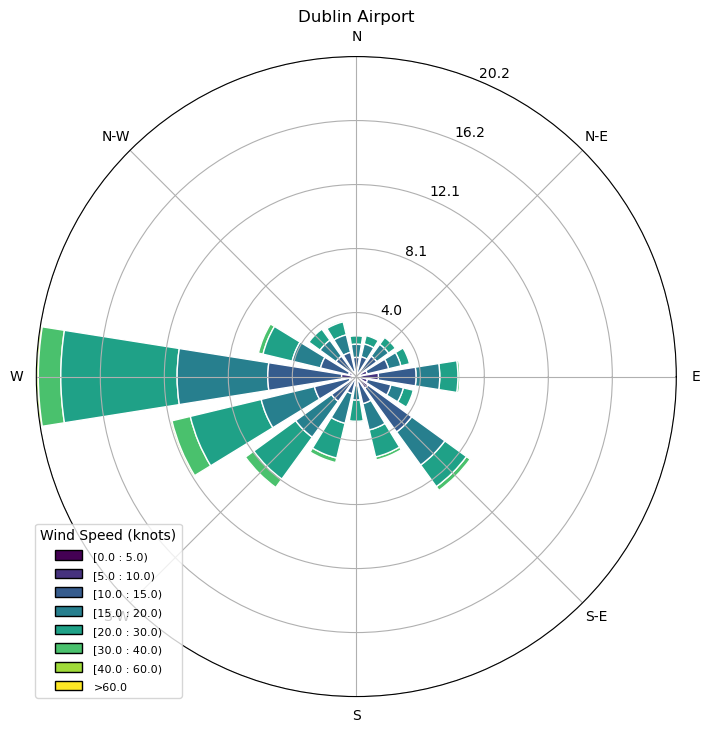

In [694]:
from windrose import WindroseAxes

# Create Wind Rose for Dublin Airport


dublin = all_airports[all_airports['Airport'] == 'Dublin'].copy()

# Filter for one airport and make a copy
dublin = all_airports[all_airports['Airport'] == 'Dublin'].copy()

# Convert to numeric (coerce invalid strings to NaN) and drop missing values
directions = pd.to_numeric(dublin['Mean_Wind_Direction(degrees)'], )
speeds = pd.to_numeric(dublin['Max_Wind_Speed(knots)'], )

mask = directions.notna() & speeds.notna()
directions = directions[mask].astype(float) % 360  # ensure numeric and 0-360 range
speeds = speeds[mask].astype(float)

fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)

ax.bar(
    directions,
    speeds,
    normed=True,
    opening=0.8,
    edgecolor='white',
    bins=[0, 5, 10, 15, 20, 30, 40, 60]
)

ax.set_title("Dublin Airport")
ax.set_legend(title="Wind Speed (knots)")

plt.tight_layout()

# plt.savefig('Wind_Rose_Dublin_Airport.png')

plt.show()


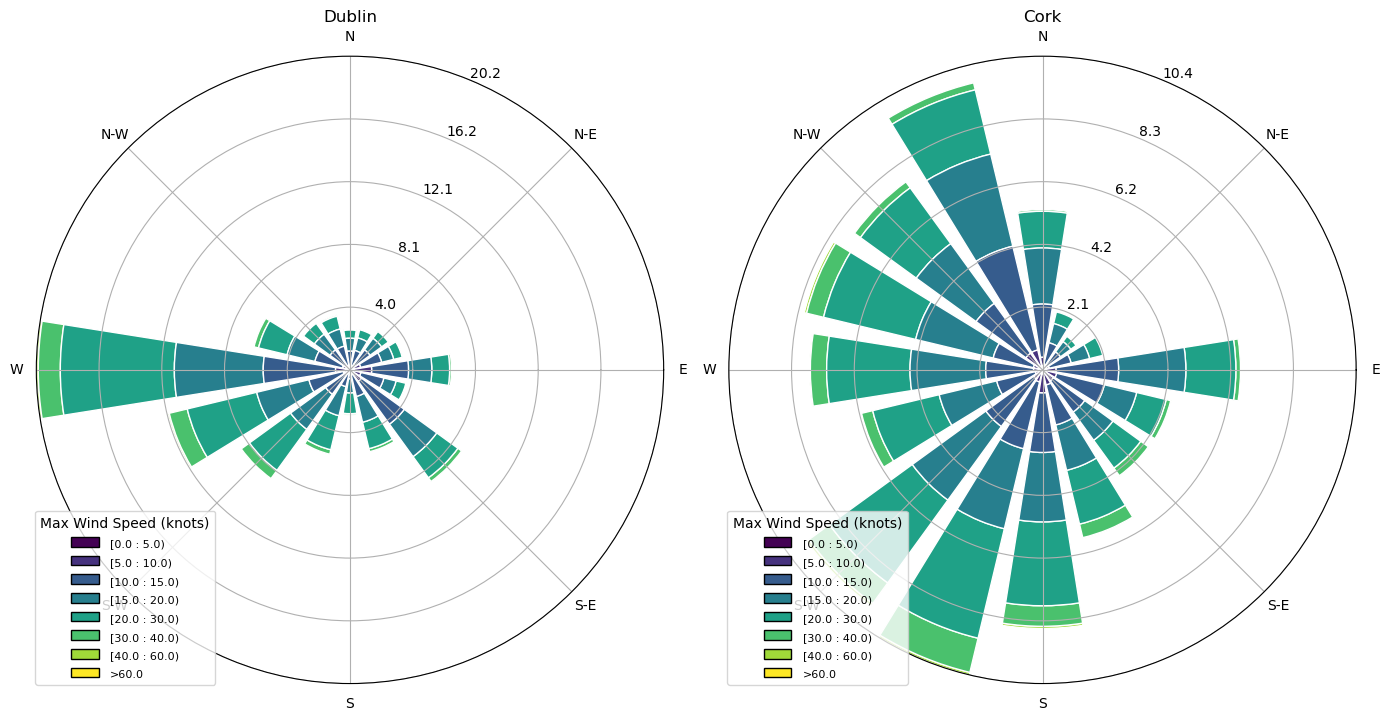

In [ ]:
fig = plt.figure(figsize=(14, 7))

airports = ['Dublin', 'Cork']

for i, airport in enumerate(airports, 1):
    ax = fig.add_subplot(1, 2, i, projection='windrose')
    data = all_airports[all_airports['Airport'] == airport].copy()

    # ensure numeric types and drop invalid rows
    directions = pd.to_numeric(data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
    speeds = pd.to_numeric(data['Max_Wind_Speed(knots)'], errors='coerce')

    mask = directions.notna() & speeds.notna()
    if not mask.any():
        ax.set_title(f"{airport} (no valid data)")
        continue

    ax.bar(
        directions[mask],
        speeds[mask],
        bins=[0, 5, 10, 15, 20, 30, 40, 60],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )

    ax.set_title(f"{airport}")
    ax.set_legend(title="Max Wind Speed (knots)")

# plt.savefig('Wind_Rose_Wind_Direction_Dublin_Cork_Airports.png')

plt.tight_layout()
plt.show()


__Dublin Airport/Cork Airport Wind Direction vs Max Wind Speed Analysis:__ 

Looking at this Windrose, its clear to see Dublin Airport shows a strong dominance of west and south west winds. The higher Knot speeds can be associated with the Atlantic airflow coming from the west.

Cork Airport shows a range of different directions and a much greater freaquency of strong winds coming in from the southwest, highlighting the exposure to the Atlantic Coast.


lets looks at seasonal data - look at code here - not loading thinking linked to month not parse correctly 

In [696]:
# Filter for months and seasons



def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'


In [697]:
# Plot windrose by season

def plot_windrose_by_season(airport_name):
    airport_data = all_airports[all_airports['Airport'] == airport_name].copy()
    
    # Add month and season columns
    airport_data['month'] = airport_data.index.month
    airport_data['season'] = airport_data['month'].apply(get_season)
    
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    
    fig = plt.figure(figsize=(14, 10))
    
    for i, season in enumerate(seasons, 1):
        ax = fig.add_subplot(2, 2, i, projection='windrose')
        season_data = airport_data[airport_data['season'] == season]
        
        directions = pd.to_numeric(season_data['Mean_Wind_Direction(degrees)'], errors='coerce') % 360
        speeds = pd.to_numeric(season_data['Max_Wind_Speed(knots)'], errors='coerce')
        
        mask = directions.notna() & speeds.notna()
        if not mask.any():
            ax.set_title(f"{season} (no valid data)")
            continue
        
        ax.bar(
            directions[mask],
            speeds[mask],
            bins=[0, 5, 10, 15, 20, 30, 40, 60],
            normed=True,
            opening=0.8,
            edgecolor='white'
        )
        
        ax.set_title(f"{season}")
        ax.set_legend(title="Wind Speed (knots)")
    
    plt.suptitle(f"Wind Rose by Season – {airport_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


    

In [698]:
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

def plot_windrose_by_season(all_airports, airport_name):
    ax = WindroseAxes.from_ax()
    ax.bar(
        data['Mean_Wind_Direction(degrees)'],
        data['Max_Wind_Speed(knots)'],
        normed=True,
        opening=0.8,
        edgecolor='white'
    )
    ax.set_title(f"{airport_name} - {seasons}")
    ax.set_legend(title="Wind Speed (knots)")
    plt.tight_layout()
    plt.show()
